In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from datetime import datetime

In [158]:
ls

currency.csv  currency.ipynb


In [159]:
money = pd.read_csv("currency.csv")

In [160]:
money.head(5)

,nominal,data,curs,cdx
0,1,10.01.2018,"57,0463",Доллар США
1,1,11.01.2018,"56,8734",Доллар США
2,1,12.01.2018,"56,9957",Доллар США
3,1,13.01.2018,"56,6019",Доллар США
4,1,16.01.2018,"56,3569",Доллар США


In [161]:
target_columns = ["data", "curs"]

In [162]:
print(target_columns)

['data', 'curs']


In [163]:
money = money[target_columns]
money.head(10)

,data,curs
0,10.01.2018,"57,0463"
1,11.01.2018,"56,8734"
2,12.01.2018,"56,9957"
3,13.01.2018,"56,6019"
4,16.01.2018,"56,3569"
5,17.01.2018,"56,3878"
6,18.01.2018,"56,5925"
7,19.01.2018,"56,7597"
8,20.01.2018,"56,5892"
9,23.01.2018,"56,6261"


In [164]:
real_columns = ["date","value"]

In [165]:
money.columns = real_columns


In [166]:
money.head(5)

,date,value
0,10.01.2018,"57,0463"
1,11.01.2018,"56,8734"
2,12.01.2018,"56,9957"
3,13.01.2018,"56,6019"
4,16.01.2018,"56,3569"


In [167]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 2 columns):
date     358 non-null object
value    358 non-null object
dtypes: object(2)
memory usage: 5.7+ KB


In [168]:
def convert_money(string):
    return float(string.replace(",", "."))

In [169]:
type (convert_money("123,123"))

float

In [170]:
def convert_date(string):
    return datetime.strptime(string, "%d.%m.%Y")

In [171]:
money["date"] = money["date"].apply(convert_date)
money["value"] = money["value"].apply(convert_money)

In [172]:
money.head(5)

,date,value
0,2018-01-10,57.0463
1,2018-01-11,56.8734
2,2018-01-12,56.9957
3,2018-01-13,56.6019
4,2018-01-16,56.3569


In [173]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 2 columns):
date     358 non-null datetime64[ns]
value    358 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.7 KB


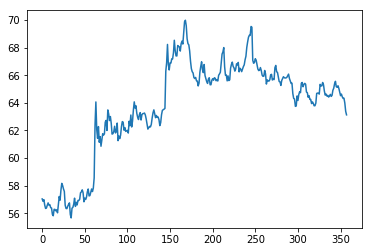

In [176]:
plt.plot(money["value"])


In [177]:
from sklearn.linear_model import LinearRegression

In [179]:
money["id"] = range(len(money))

In [182]:
len(money)

358

In [180]:
money.head(5)

,date,value,id
0,2018-01-10,57.0463,0
1,2018-01-11,56.8734,1
2,2018-01-12,56.9957,2
3,2018-01-13,56.6019,3
4,2018-01-16,56.3569,4


In [185]:
end = 340

In [192]:
X = money[["id"]][:end]
y = money["value"][:end]

In [193]:
X_test = money[["id"]][end:]
y_test = money["value"][end:]

In [194]:
reg = LinearRegression().fit(X,y)

In [196]:
y_pred = reg.predict(X_test)


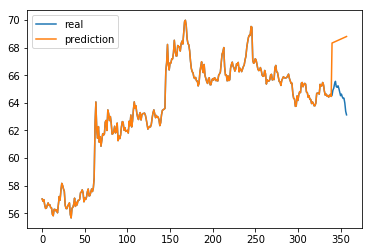

In [198]:
plt.plot(money["value"], label = "real")
plt.plot(list(y) + list(y_pred), label = "prediction")
plt.legend()

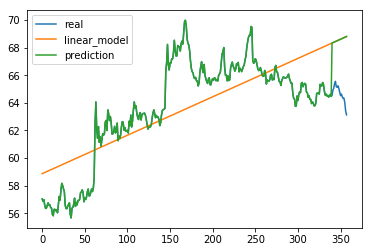

In [200]:
plt.plot(money["value"], label = "real")
plt.plot(reg.predict(money[["id"]]), label = "linear_model")

plt.plot(list(y) + list(y_pred), label = "prediction")
plt.legend()